In [8]:
import numpy as np 
from qc_lab.algorithms import MeanField
from qc_lab.models import SpinBosonModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver



simulation_settings = dict(dt = 0.01, tmax = 25, num_trajs = 1000, batch_size = 1000)
sim = Simulation(simulation_settings)
sim.model = SpinBosonModel(dict(l_reorg=1/4,V=1,E=0.5,W=0.1))
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_mf = serial_driver(sim)

100%|██████████| 2501/2501 [00:26<00:00, 94.76it/s]


1000


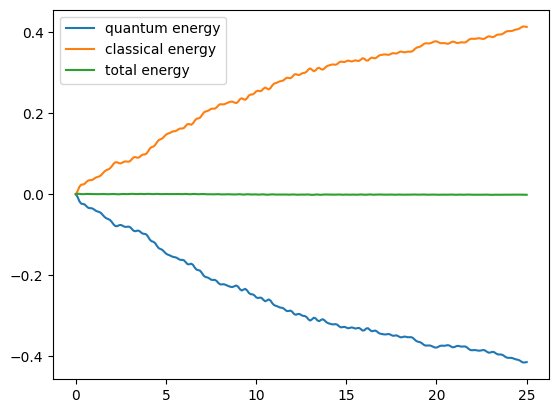

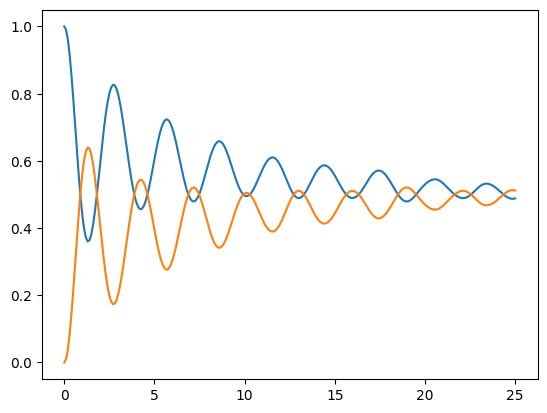

In [9]:
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
plt.show()

In [20]:
import numpy as np 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping
from qc_lab.models import SpinBosonModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver



simulation_settings = dict(dt = 0.001, tmax = int(1/0.0260677), num_trajs = 5000, batch_size = 5000)
sim = Simulation(simulation_settings)
sim.model = SpinBosonModel(dict(temp = 1, V=1.0, E=0.5, A=100, W=0.1, l_reorg=1.0/4))
sim.algorithm = FewestSwitchesSurfaceHopping()


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_fssh = serial_driver(sim)

  0%|          | 89/38001 [00:07<51:23, 12.29it/s] 


KeyboardInterrupt: 

1000


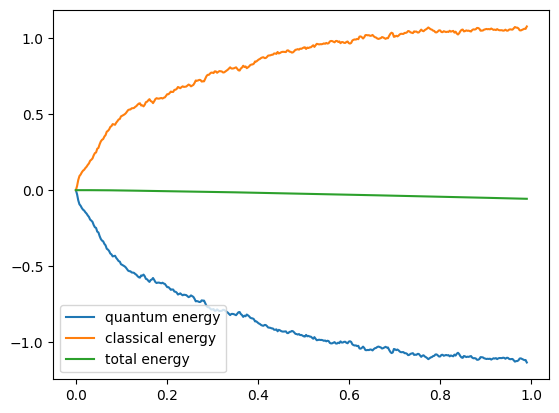

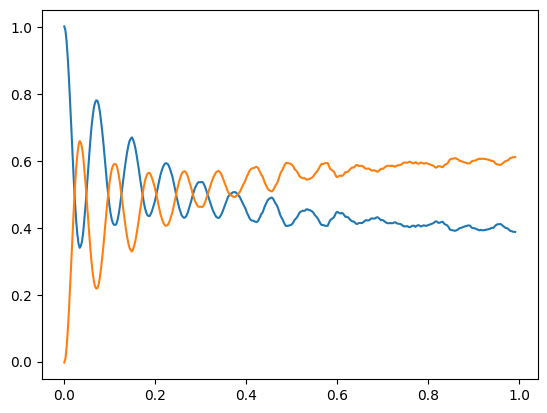

In [19]:
data = data_fssh
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
t_ps = sim.settings.tdat_output * 0.0260677

import matplotlib.pyplot as plt
plt.plot(t_ps,eq-eq[0], label='quantum energy')
plt.plot(t_ps,ec-ec[0], label='classical energy') 
plt.plot(t_ps,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(t_ps,pops)
plt.show()

1000


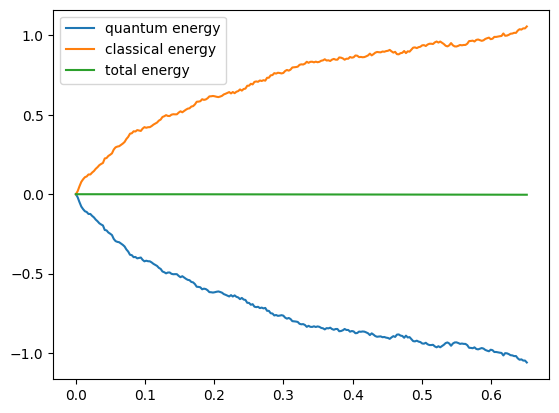

1000


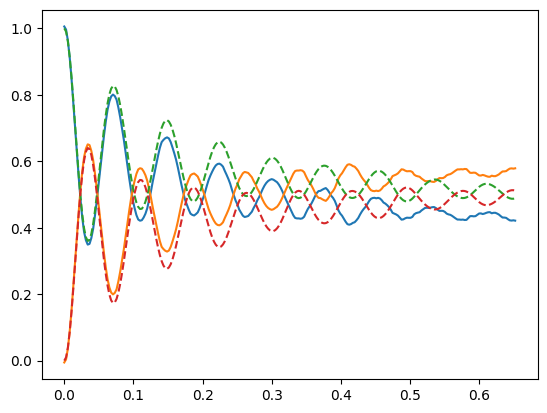

In [13]:
data = data_fssh
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
t_ps = sim.settings.tdat_output * 0.0260677

import matplotlib.pyplot as plt
plt.plot(t_ps,eq-eq[0], label='quantum energy')
plt.plot(t_ps,ec-ec[0], label='classical energy') 
plt.plot(t_ps,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(t_ps,pops)
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
plt.plot(t_ps,pops, linestyle='dashed')
plt.show()
